In [2]:
pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install plotnine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 40.5 MB/s eta 0:00:00:00:01


In [1]:
import pandas as pd
import plotnine as pn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

%matplotlib inline

In [2]:
# https://archive.ics.uci.edu/dataset/913/forty+soybean+cultivars+from+subsequent+harvests

# Load the dataset
data = 'soybean/data.csv'

# Read the dataset
data = pd.read_csv(data)
data.head(10)

,Season,Cultivar,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,NEO 760 CE,1,58.80,15.20,98.2,177.80,1.81,5.20,152.20,3232.82
1,1,NEO 760 CE,2,58.60,13.40,102.0,195.00,1.85,7.20,141.69,3517.36
2,1,NEO 760 CE,3,63.40,17.20,100.4,203.00,2.02,6.80,148.81,3391.46
3,1,NEO 760 CE,4,60.27,15.27,100.2,191.93,1.89,6.40,148.50,3312.58
4,1,MANU IPRO,1,81.20,18.00,98.8,173.00,1.75,7.40,145.59,3230.99
5,1,MANU IPRO,2,75.80,20.80,69.2,128.00,1.85,7.20,154.87,3374.80
6,1,MANU IPRO,3,84.40,15.80,95.4,161.80,1.70,6.80,150.23,3182.76
7,1,MANU IPRO,4,80.47,18.20,87.8,154.27,1.77,7.13,149.90,3165.72
8,1,77HO111I2X - GUAPORÉ,1,52.20,14.40,64.8,148.80,2.30,7.20,180.25,3640.46
9,1,77HO111I2X - GUAPORÉ,2,55.80,15.80,72.0,188.80,2.62,6.20,176.75,3602.34


In [7]:
#imprimir ultimas 10 filas
data.tail(10)

,Season,Cultivar,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
310,2,NK 8770 IPRO,3,91.40,18.20,60.20,141.40,2.35,3.60,166.68,3150.862069
311,2,NK 8770 IPRO,4,89.60,16.27,70.93,151.13,2.12,3.00,160.81,3037.189655
312,2,FTR 4288 IPRO,1,82.60,16.00,84.00,147.20,1.75,3.60,146.98,3475.448276
313,2,FTR 4288 IPRO,2,87.60,15.80,79.20,151.80,1.92,3.80,139.22,3409.103448
314,2,FTR 4288 IPRO,3,94.80,17.20,64.00,118.00,1.84,3.60,135.65,3304.678161
315,2,FTR 4288 IPRO,4,88.33,16.33,75.73,139.00,1.84,3.67,135.19,3348.931034
316,2,FTR 3190 IPRO,1,64.40,16.60,76.00,168.00,2.21,3.60,145.69,3418.850575
317,2,FTR 3190 IPRO,2,64.60,17.60,116.80,271.20,2.32,3.80,147.24,3651.586207
318,2,FTR 3190 IPRO,3,58.80,14.80,86.40,180.60,2.09,2.20,156.32,3487.931034
319,2,FTR 3190 IPRO,4,62.60,16.33,93.07,206.60,2.21,3.20,157.61,3605.310345


In [3]:
# Identify missing values
data.isnull().sum()
print(data.isnull().sum())

# Shape of the dataset
data.shape
print(data.shape)

Season        0
Cultivar      0
Repetition    0
PH            0
IFP           0
NLP           0
NGP           0
NGL           0
NS            0
MHG           0
GY            0
dtype: int64
(320, 11)


In [4]:
# Statistical description of the DataFrame
data.describe()
print(data.describe())

           Season  Repetition          PH       IFP         NLP         NGP  \
count  320.000000  320.000000  320.000000  320.0000  320.000000  320.000000   
mean     1.500000    2.500000   68.386781   15.4650   59.088313  135.085844   
std      0.500783    1.119785    8.958194    3.0243   20.068187   60.494529   
min      1.000000    1.000000   47.600000    7.2000   20.200000   47.800000   
25%      1.000000    1.750000   62.950000   13.6000   44.350000   95.052500   
50%      1.500000    2.500000   67.200000   15.6000   54.500000  123.000000   
75%      2.000000    3.250000   74.347500   17.3300   71.220000  161.350000   
max      2.000000    4.000000   94.800000   26.4000  123.000000  683.400000   

              NGL          NS         MHG           GY  
count  320.000000  320.000000  320.000000   320.000000  
mean     2.290844    4.071656  168.322313  3418.553794  
std      0.840116    1.474531   19.625566   503.003602  
min      0.940000    0.400000  127.060000  1538.230000  
25%

In [5]:
# Count the number of unique options in the 'Cultivar' column
unique_cultivars = data['Cultivar'].nunique()
print(f"Number of unique options in the 'Cultivar' column: {unique_cultivars}")

Number of unique options in the 'Cultivar' column: 40


In [6]:
# Print the unique options in the 'Cultivar' column
unique_cultivars = data['Cultivar'].unique()
print(f"Unique options in the 'Cultivar' column: {unique_cultivars}")

Unique options in the 'Cultivar' column: ['NEO 760 CE' 'MANU IPRO' '77HO111I2X - GUAPORÉ' 'NK 7777 IPRO'
 'GNS7900 IPRO - AMPLA' 'LTT 7901 IPRO' 'BRASMAX BÔNUS IPRO' '97Y97 IPRO'
 'BRASMAX OLIMPO IPRO' 'LYNDA IPRO' 'NK 8100 IPRO'
 '82HO111 IPRO - HO COXIM IPRO' '83IX84RSF I2X' 'ADAPTA LTT 8402 IPRO'
 '98R30 CE' 'FORTALEZA IPRO' 'MONSOY 8330I2X' 'SUZY IPRO' 'TMG 22X83I2X'
 'EXPANDE LTT 8301 IPRO' 'FORTALECE L090183 RR' '96R29 IPRO' '74K75RSF CE'
 'FTR 3868 IPRO' 'GNS7700 IPRO' 'ELISA IPRO' '79I81RSF IPRO'
 'NEO 790 IPRO' 'PAULA IPRO' 'FTR 3179 IPRO' 'LAT 1330BT' 'FTR 4280 IPRO'
 'ATAQUE I2X' 'SYN2282IPRO' '82I78RSF IPRO' 'M 8644 IPRO'
 'MONSOY M8606I2X' 'NK 8770 IPRO' 'FTR 4288 IPRO' 'FTR 3190 IPRO']


In [8]:
# Filter and print rows where the 'Cultivar' column is 'NEO 760 CE'
neo_760_ce_rows = data[data['Cultivar'] == 'NEO 760 CE']
print(neo_760_ce_rows)

     Season    Cultivar  Repetition     PH    IFP     NLP     NGP   NGL    NS  \
0         1  NEO 760 CE           1  58.80  15.20   98.20  177.80  1.81  5.20   
1         1  NEO 760 CE           2  58.60  13.40  102.00  195.00  1.85  7.20   
2         1  NEO 760 CE           3  63.40  17.20  100.40  203.00  2.02  6.80   
3         1  NEO 760 CE           4  60.27  15.27  100.20  191.93  1.89  6.40   
160       2  NEO 760 CE           1  76.40  16.00   39.40   99.40  2.52  1.80   
161       2  NEO 760 CE           2  80.60  14.60   70.00  174.00  2.49  3.00   
162       2  NEO 760 CE           3  65.20  13.20   50.00  126.40  2.53  4.00   
163       2  NEO 760 CE           4  74.07  14.60   53.13  133.27  2.51  2.93   

        MHG           GY  
0    152.20  3232.820000  
1    141.69  3517.360000  
2    148.81  3391.460000  
3    148.50  3312.580000  
160  162.46  3087.155172  
161  169.60  3236.275862  
162  150.70  3329.620690  
163  161.52  3192.873563  


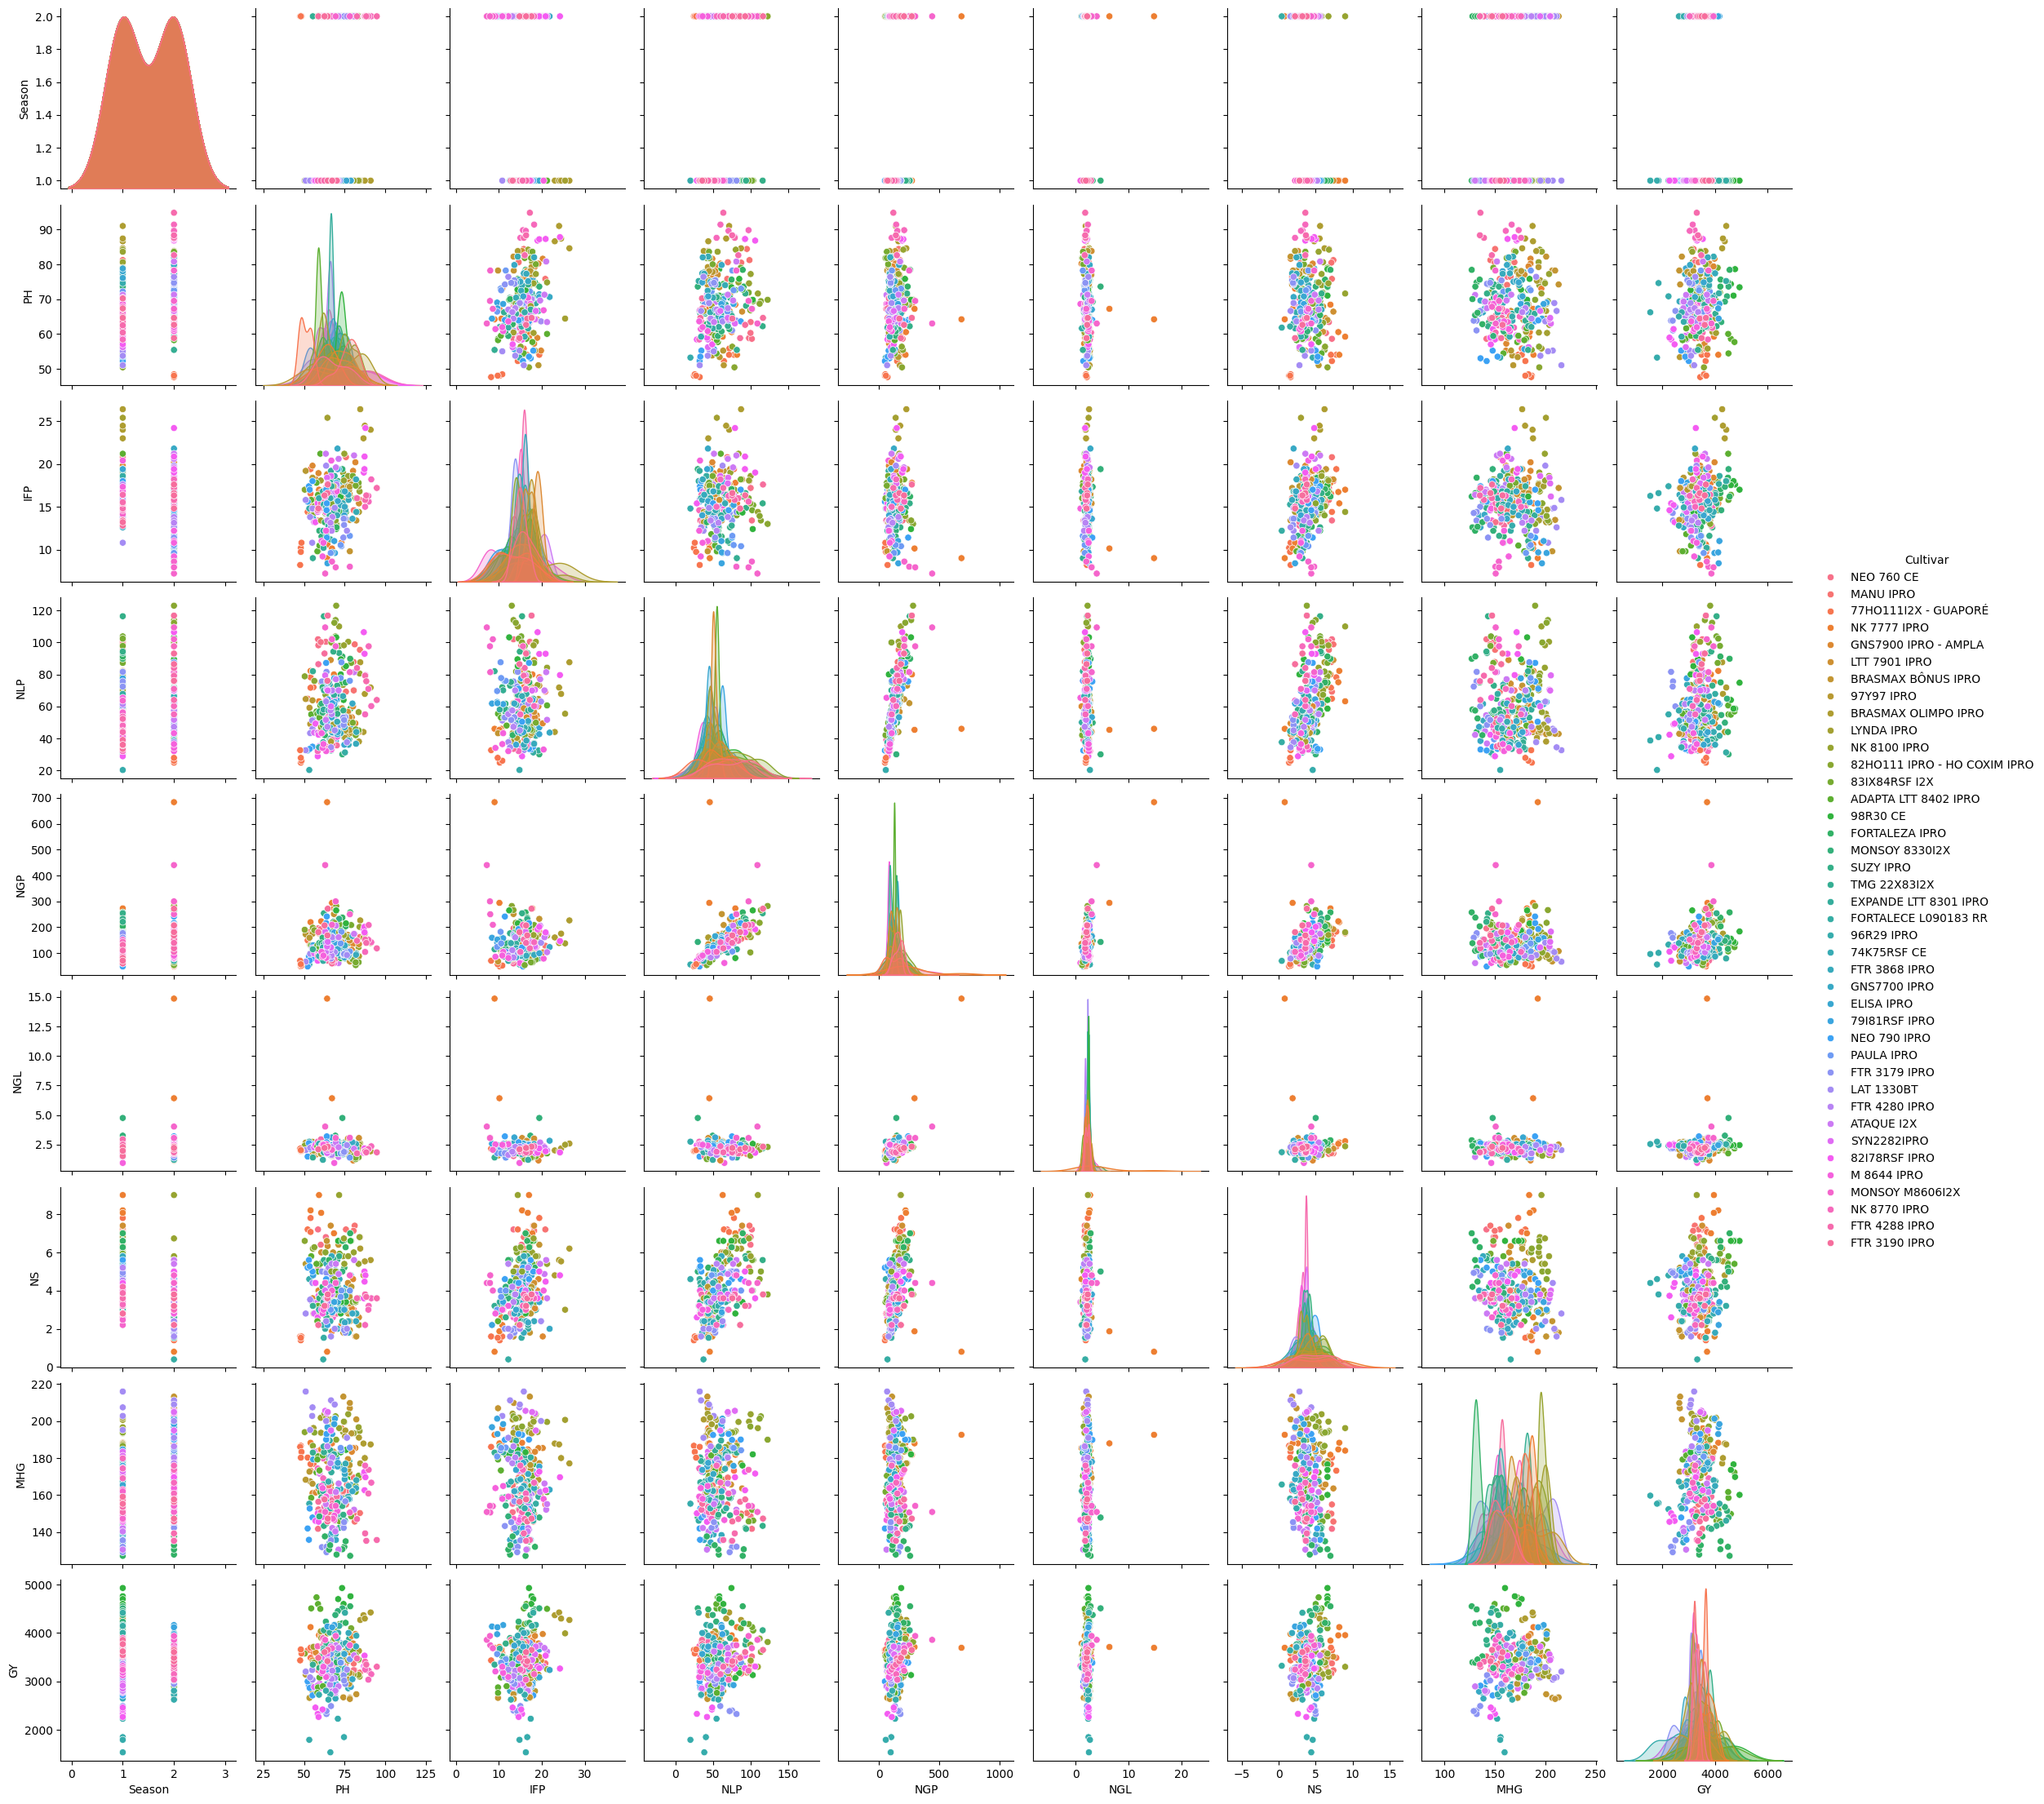

In [9]:
# Remove the 'Repetition' column from the dataset
data = data.drop(columns=['Repetition'])

# Create a pair plot for the entire dataset
sns.pairplot(data, hue='Cultivar')

# Show the plot
plt.show()

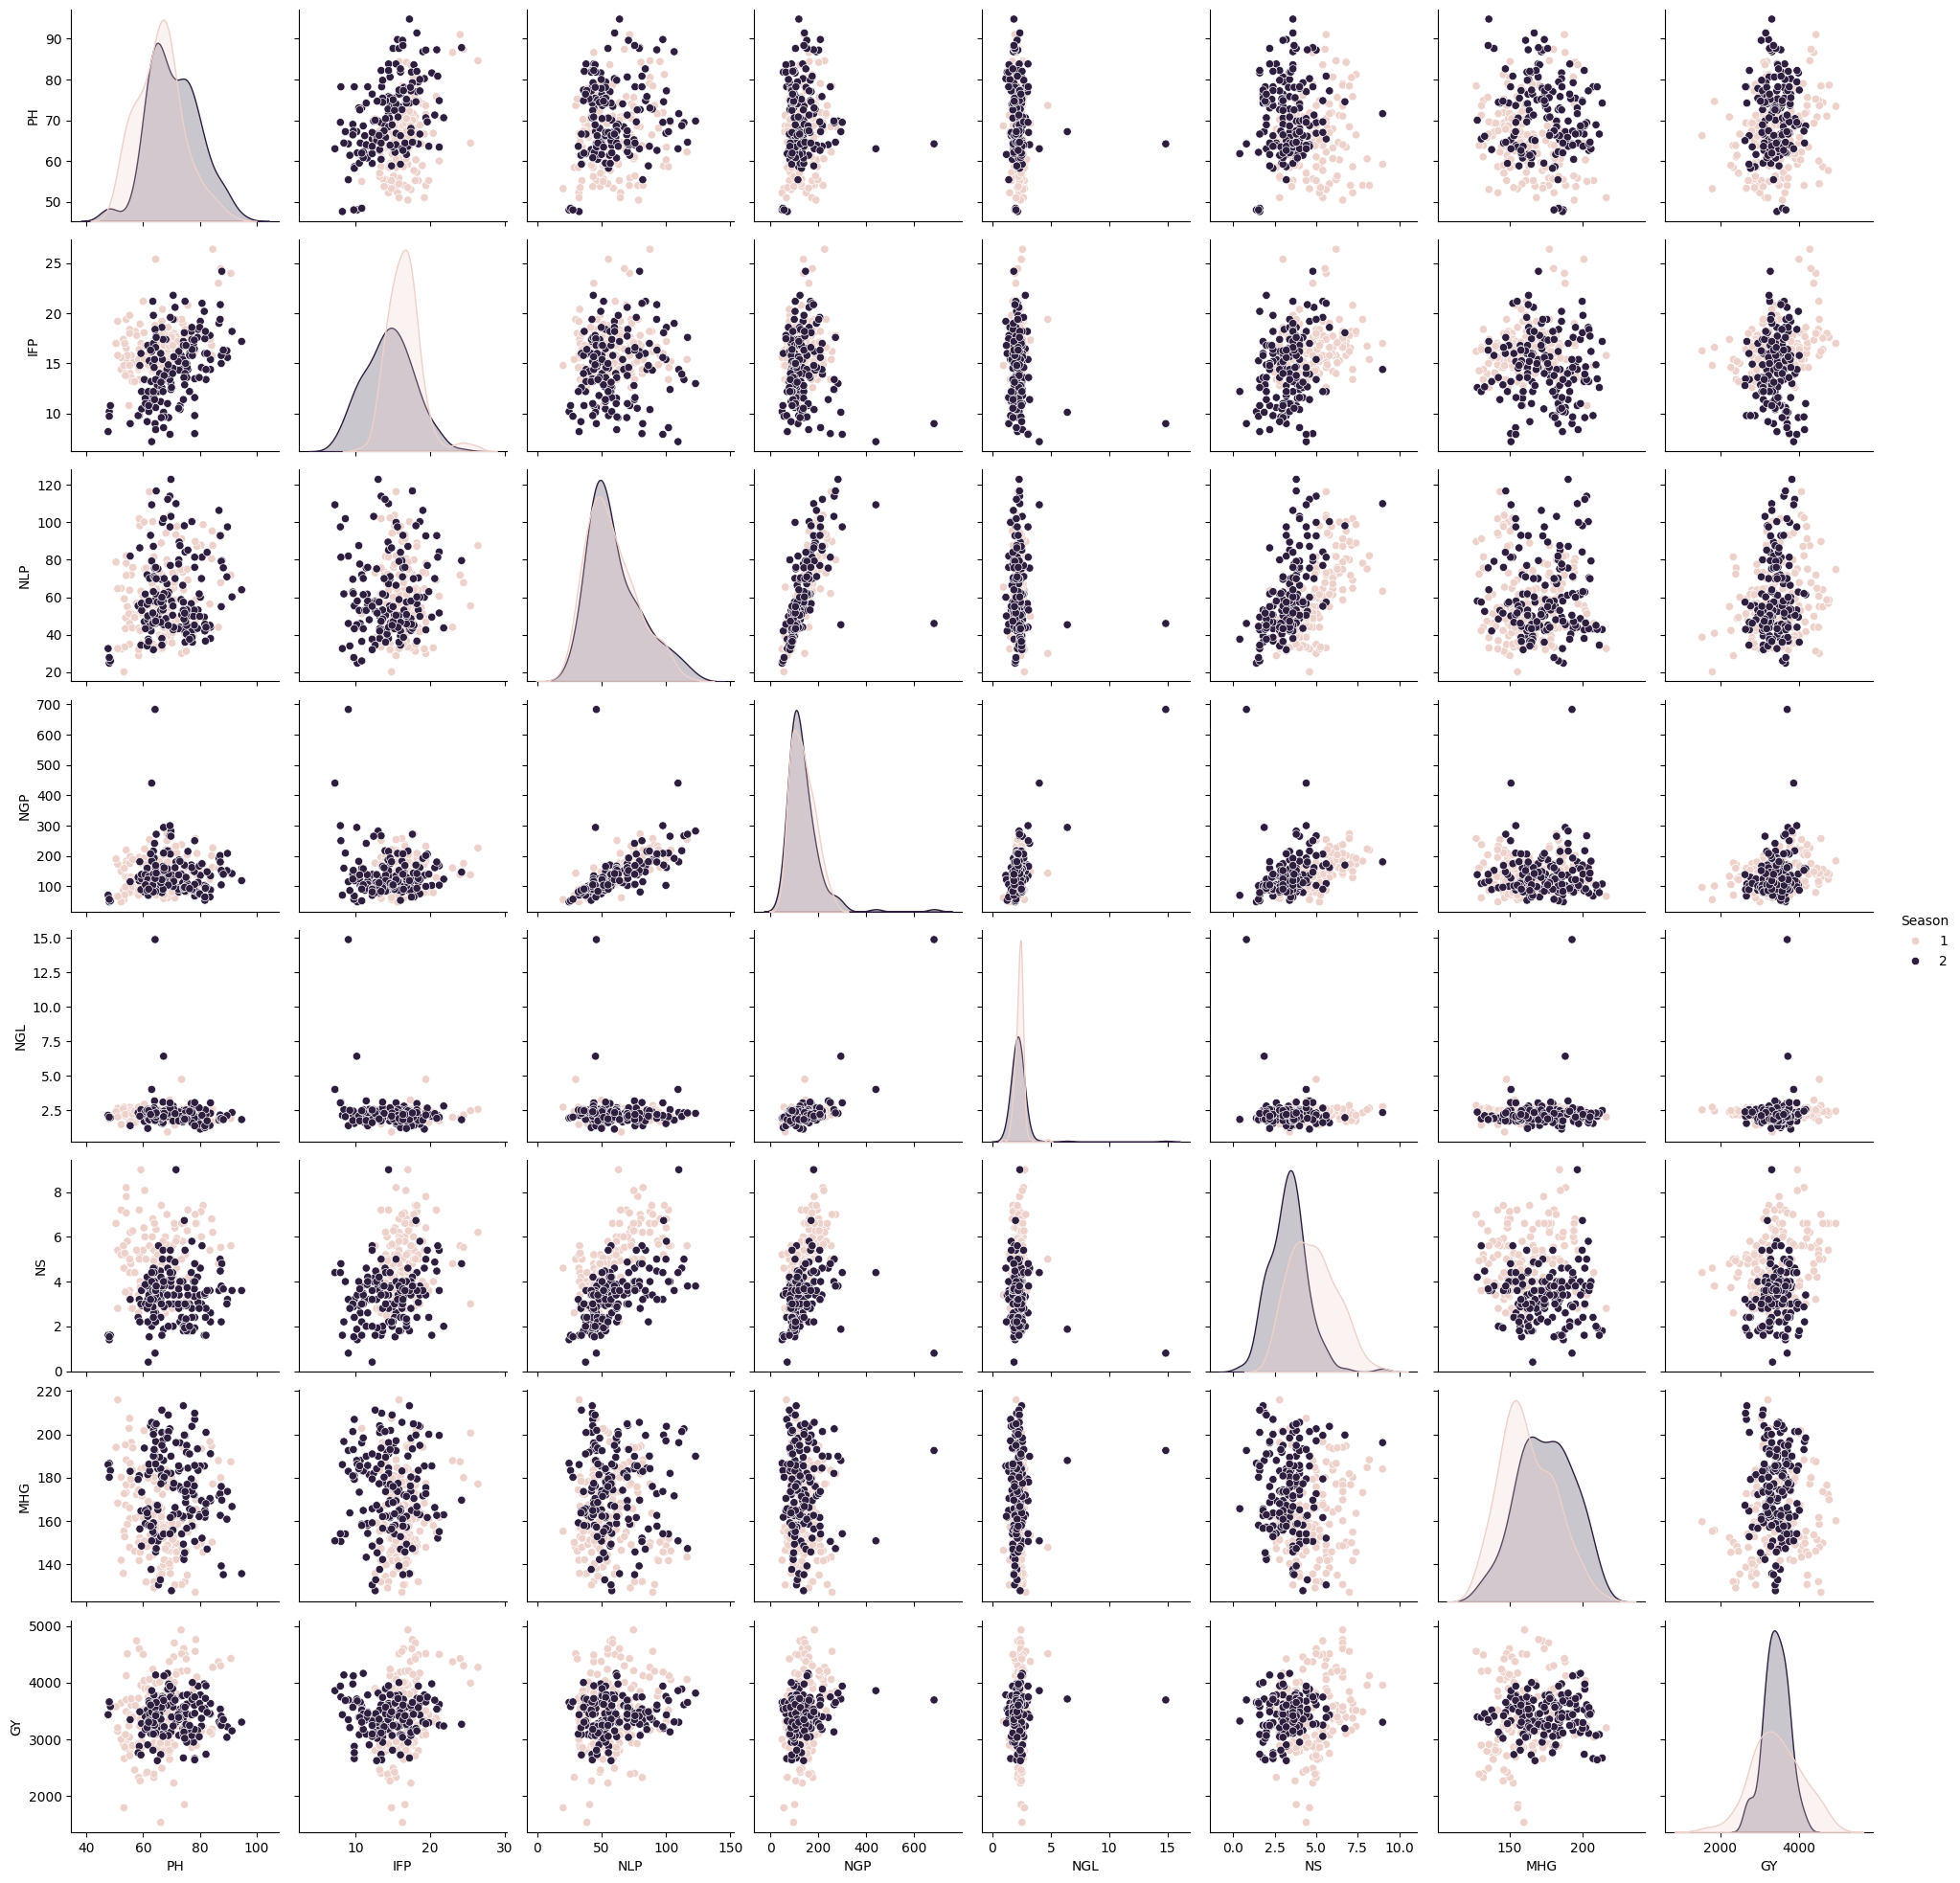

In [17]:
# Remove the 'Repetition' column from the dataset
data = data.drop(columns=['Repetition'])

# Filter classes 1, 2, and 3
df_filtered = data[data['Season'].isin([1, 2])]

# Create the pair plot
sns.pairplot(df_filtered, hue='Season')

# Show the plot
plt.show()

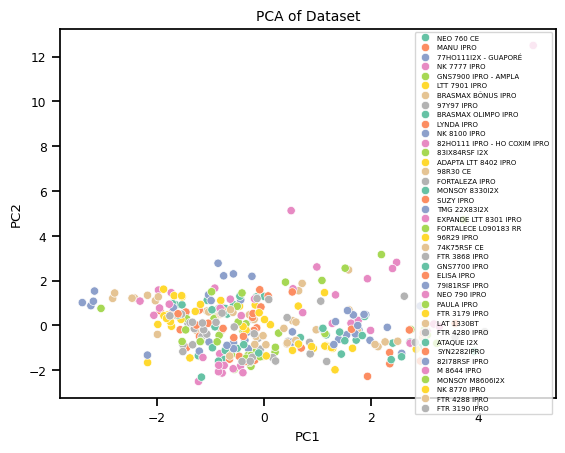

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['Cultivar']))  # Exclude 'Cultivar' if it's categorical

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cultivar'] = data['Cultivar']  # Add the 'Cultivar' column back for labeling

# Visualize the PCA results
sns.set_context("notebook", font_scale=0.8)  # Adjust font scale for smaller labels
scatter_plot = sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cultivar', palette='Set2')
plt.title('PCA of Dataset', fontsize=10)  # Adjust title font size
plt.legend(fontsize=5)  # Adjust legend font size
plt.show()

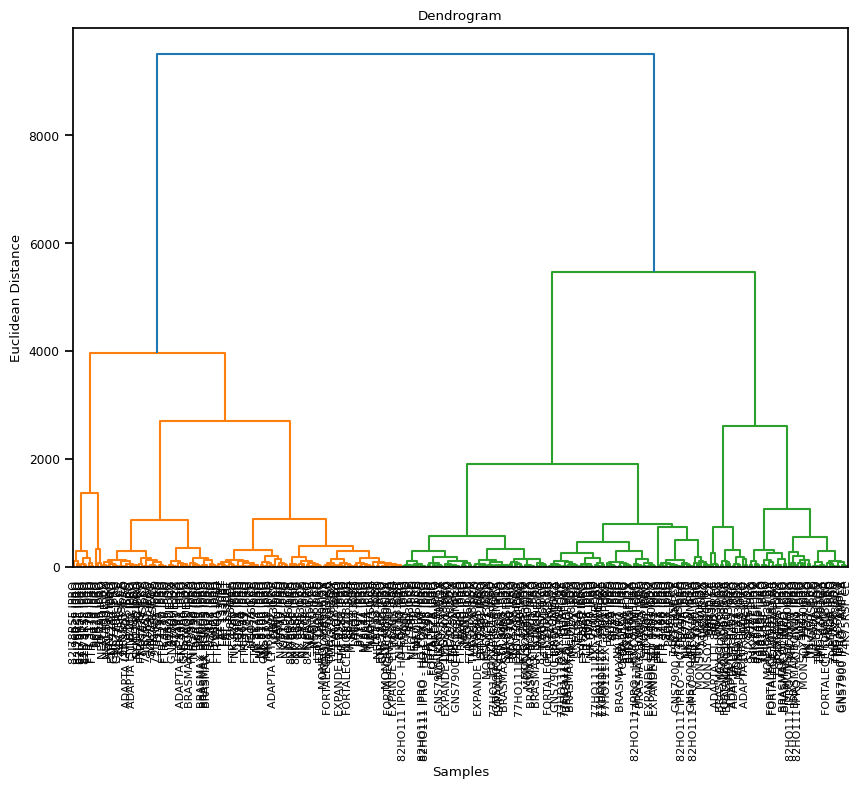

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame and you want to cluster all numeric columns
# Drop non-numeric columns (e.g., 'Cultivar') if necessary
data_numeric = data.select_dtypes(include=['float64', 'int64'])

# Perform hierarchical clustering
linked = linkage(data_numeric, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=data['Cultivar'].values, leaf_rotation=90, leaf_font_size=8)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

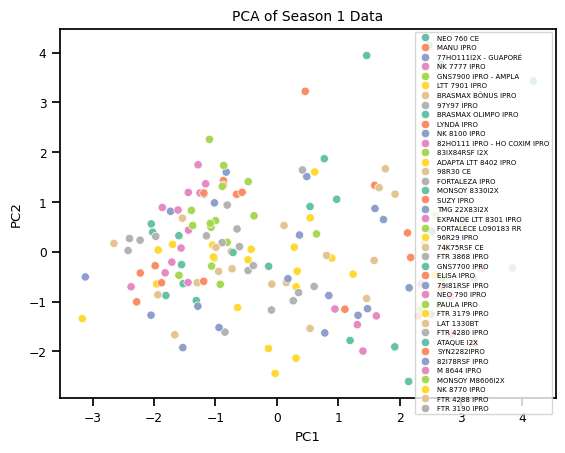

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Filter the data for Season 1
season_1_data = data[data['Season'] == 1]

# Standardize the data (excluding 'Cultivar' and 'Season' columns)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(season_1_data.drop(columns=['Cultivar', 'Season']))

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cultivar'] = season_1_data['Cultivar'].values  # Add the 'Cultivar' column back for labeling

# Visualize the PCA results
sns.set_context("notebook", font_scale=0.8)  # Adjust font scale for smaller labels
scatter_plot = sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cultivar', palette='Set2')
plt.title('PCA of Season 1 Data', fontsize=10)  # Adjust title font size
plt.legend(fontsize=5)  # Adjust legend font size
plt.show()

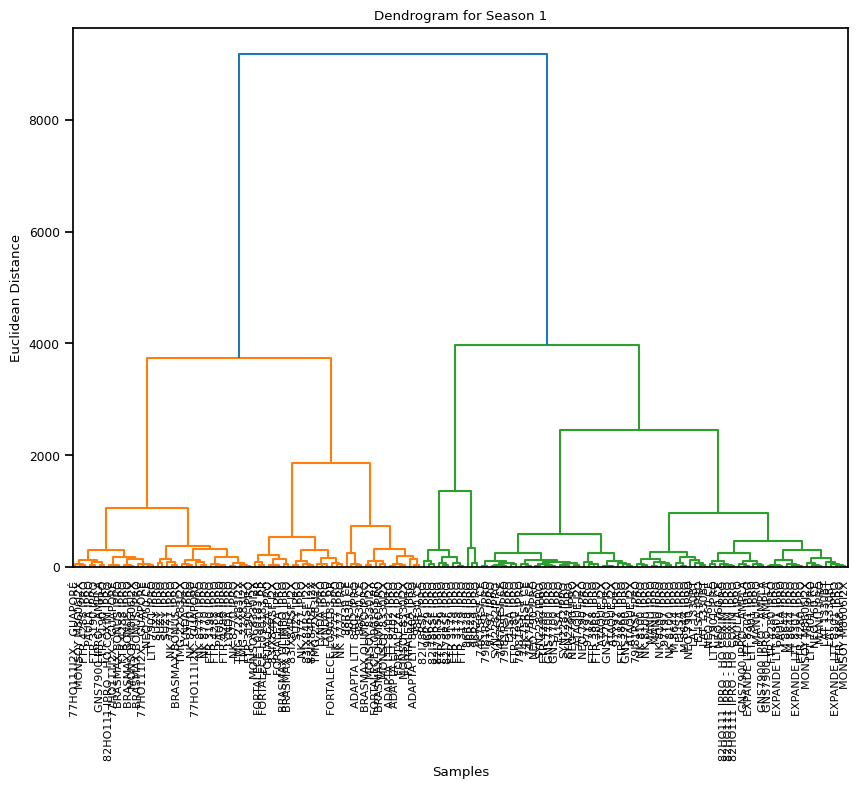

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd

# Filter the data for Season 1
season_1_data = data[data['Season'] == 1]

# Select only numeric columns (drop non-numeric columns like 'Cultivar' and 'Season')
data_numeric = season_1_data.select_dtypes(include=['float64', 'int64'])

# Perform hierarchical clustering
linked = linkage(data_numeric, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=season_1_data['Cultivar'].values, leaf_rotation=90, leaf_font_size=8)
plt.title('Dendrogram for Season 1')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()